**Data dictionary**

<font color='blue'><b>- Features V1, V2, … V28 : principal components obtained with PCA due to confidentiality <br>
<font color='blue'><b>- Time : contains the seconds elapsed between each transaction and the first transaction in the dataset<br> 
<font color='blue'><b>- Amount: transaction Amount <br> 
<font color='blue'><b>- Class: 1 in case of fraud and 0 otherwise

**Importing basic libraries**

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Read data**

In [57]:
df = pd.read_csv('BankOfAmerica.csv')

### 1. Getting familiar with the data

**Peak the data frame**

In [58]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Data frame info**

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Basic stats descriptive statistics (mean, median, min, max, standard deviation) for each field**

In [60]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Check for missing values**

<AxesSubplot:>

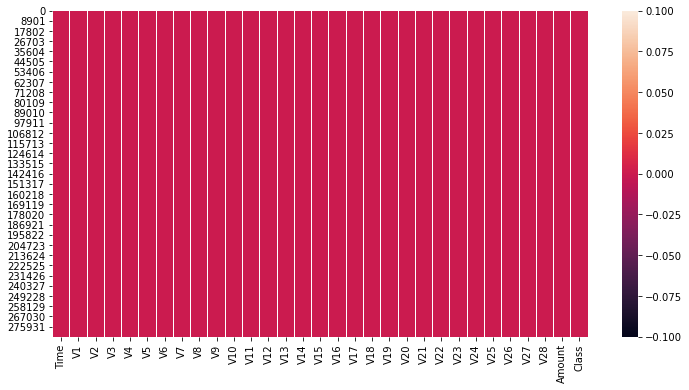

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

<font color='red'><b> What is your initial take on the dataset and it's completeness?

Data looks complete with no missing values

### 2. Exploratory Data Analysis

**Check out how many credit card frauds there were**

Text(0, 0.5, 'Count')

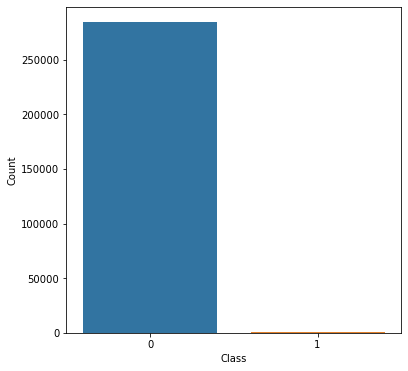

In [62]:
plt.figure(figsize=(6,6))
sns.countplot(df['Class'])
plt.xlabel('Class')
plt.ylabel('Count')

<font color='red'><b> Do the classes look balanced? Could this be a class imbalance problem? Do your research on class imbalance in supervised learning, it's implications to modeling and methods to tackle

There is a class imbalance in the classes

<font color='red'><b>What other EDA's can you think of doing? Try 1 or 2 below.

Heatmap for correlation between predictors and box plot/histogram for variable distribution

**Let's look at the imbalance in more detail**

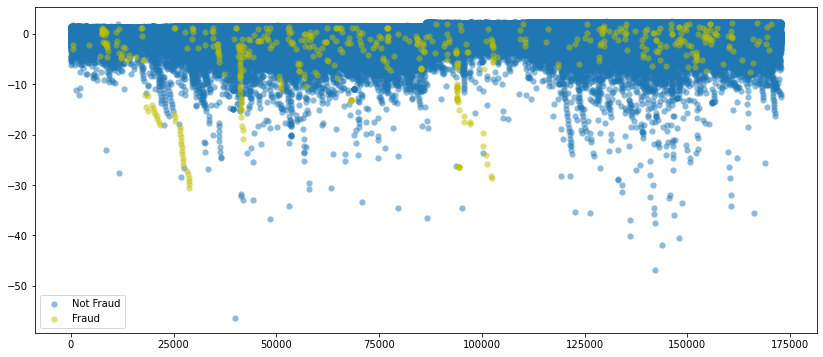

In [63]:
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Not Fraud", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Fraud", alpha=0.5, linewidth=0.15, c='y')
    plt.legend()
    return plt.show()

from sklearn.model_selection import train_test_split
y = df.iloc[:,-1].values
X=df.iloc[:, :-1].values

plt.figure(figsize=(14,6))
plot_data(X, y)

**There is clear imbalance. Let's look at SMOTE which is a popular method to tackle class imbalances**

**More information of SMOTE can be found here: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html**

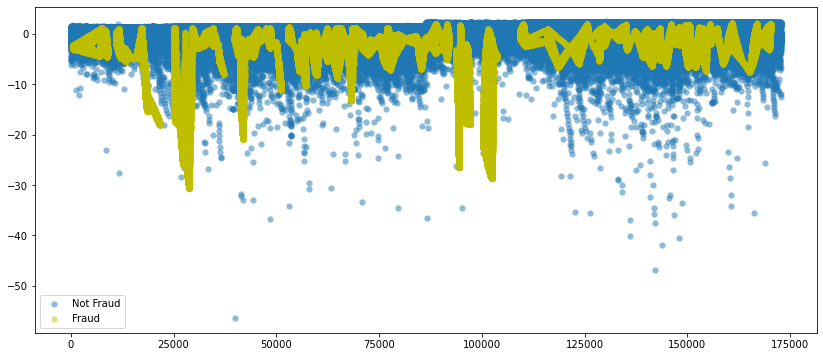

In [64]:
from imblearn.over_sampling import SMOTE

method = SMOTE(random_state=42, sampling_strategy=0.6)

X_resampled, y_resampled = method.fit_resample(X, y)

plt.figure(figsize=(14,6))
plot_data(X_resampled, y_resampled)

**We applied an upsampling technique to balance minory class in our data. Almost doubled the size of our data especially minority class by generating generic samples**

### 3. Data Modeling

**Convential Rule based system**

In [65]:
df.groupby('Class').mean()
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5), 1, 0)

**Here we have run a groupby command on our labels and obtain the mean for each feature and then implemented a rule for stating which cases are flagged as fraud**

In [66]:
print("Results of flagged fraud cases versus the actual fraud cases:\n")
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Results of flagged fraud cases versus the actual fraud cases:

Flagged Fraud       0     1
Actual Fraud               
0              283089  1226
1                 322   170


#### precision & recall

**Example using the rule based system**

In [67]:
a=df.groupby('Class').mean()
a

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,flag_as_fraud
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.004312
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,0.345528


<font color='red'><b>Do you think a rule-based system for catching credit card fraud is a good choice? What are the pros and cons?

No, with rule based system we cannot get good precision and recall
Precison = 35%, recall =12%, F1 = 18%

**Let's look at some more sophisticated machine learning solutions**

In [68]:
df.iloc[:, :-2]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [69]:
y = df.iloc[:,-2]
X = df.iloc[:, 1:-2]
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify= y)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

In [71]:
conf_mat = metrics.confusion_matrix(y_true=y_test, y_pred=predicted)
print('\nClassification Report:\n', classification_report(y_test, predicted))
print('\nConfusion matrix:\n', conf_mat)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.62      0.73       148

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443


Confusion matrix:
 [[85282    13]
 [   56    92]]



Confusion Matrix in depth analysis: 



<AxesSubplot:>

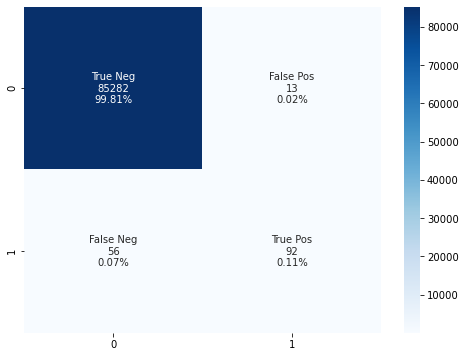

In [72]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                conf_mat.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
plt.figure(figsize=(8,6))
labels = np.asarray(labels).reshape(2,2)
print("\nConfusion Matrix in depth analysis: \n")
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues')

**Machine learning with imporved balance using SMOTE**

In [73]:
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE

resampling = SMOTE(random_state=42, sampling_strategy=0.6)
model = LogisticRegression()

pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [74]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
pipeline.fit(X_train, y_train) 
predicted_lr_smote = model.predict(X_test)

In [75]:
conf_mat_lr_smote = metrics.confusion_matrix(y_true=y_test, y_pred=predicted_lr_smote)
print('\nClassification Report:\n', classification_report(y_test, predicted_lr_smote))
print('\nConfusion matrix:\n', conf_mat_lr_smote)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.14      0.86      0.23       148

    accuracy                           0.99     85443
   macro avg       0.57      0.93      0.61     85443
weighted avg       1.00      0.99      0.99     85443


Confusion matrix:
 [[84475   820]
 [   20   128]]



Confusion Matrix in depth analysis for oversampled data: 



<AxesSubplot:>

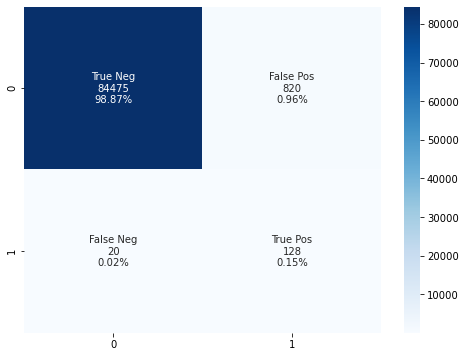

In [76]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                conf_mat_lr_smote.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conf_mat_lr_smote.flatten()/np.sum(conf_mat_lr_smote)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
plt.figure(figsize=(8,6))
labels = np.asarray(labels).reshape(2,2)
print("\nConfusion Matrix in depth analysis for oversampled data: \n")
sns.heatmap(conf_mat_lr_smote, annot=labels, fmt='', cmap='Blues')

<font color='red'><b>Compare the Confusion Matrices for the model with SMOTE and model without SMOTE to determine which model will be a better fit for this business problem

non smote has better results

<font color='red'><b>Once you finanlize if SMOTE or non-SMOTE model is better for your business case requirements, try 2 other models of your choice on the strategy and evaluate them on 2 metrics of your choice that we haven't used so far

<font color='red'><b>Pick your best performing model and explain it using success metrics <br>

<font color='green'><b>Following are theoretical questions:

<font color='red'><b>For your business case which is more important - precision or recall? Why? <br>

Both precision and recall are important. Precision because we want to keep the false positive rate low and recall because we want to capture as many frauds as possible and keep the false negative rate low - so we will go with F1 score.

<font color='red'><b>For your business case which is more important - accuracy or generalization? Why?

Accuracy because the cost of false positive is higher.

<font color='red'><b>Can you tie accuracies to business value (financial value)?

Yes - refer the slides

<font color='red'><b>Are these accuracies good enough and give the business value or the ROI they estimated? If not, what else will you do to improve accuracies to get higher business value?

Yes, refer to slides

<font color='red'><b>What other data set can you use for this project?

Customer information,Historical fraud report data, protocols,external data

<font color='red'><b>What other pre processing or processing can be done to imporove the model?

Normalization , remove outliers and add more predictors

<font color='red'><b>What other advanced algorithms would you want to try?

Tree based algorithms and deep learning


### LightGBM

In [23]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
211605,-8.367621,7.402969,-5.114191,-2.966792,-0.985904,-1.660018,0.397816,1.008250,5.290976,9.315735,...,3.589299,-0.557927,0.349087,0.301734,0.662330,1.145939,-0.012273,1.513736,0.669504,0.69
231628,-1.290662,0.764452,-0.169233,-1.688528,1.984718,-0.717210,1.667635,-0.228295,-0.959071,-0.679429,...,0.057620,0.138615,0.390374,-0.678774,0.292254,1.425865,0.265341,0.051405,0.103879,55.47
110643,-0.606860,0.233923,2.633361,-0.155762,-0.328850,-0.070593,0.173023,0.113394,0.680147,-0.686651,...,-0.129287,0.007393,0.265045,-0.040615,0.406088,-0.498823,0.121851,-0.046840,-0.087259,11.50
11478,1.374168,-0.330389,0.812971,-0.183112,-1.074771,-0.933788,-0.544238,-0.348237,0.614925,0.080408,...,0.078163,-0.134742,0.016793,0.002610,0.714527,0.536175,-0.307487,-0.003555,0.013024,10.00
243724,-2.146505,-7.603113,-4.928224,1.449173,-2.083871,-0.984759,3.629816,-1.302973,-1.434148,-0.021909,...,4.009181,1.274986,-0.857670,-2.109682,0.169338,-0.322888,0.777822,-0.552258,0.304777,2290.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88290,-1.993953,1.734986,-1.108037,-2.671817,1.605319,3.041992,-0.417771,1.438007,0.945437,1.017181,...,0.775705,-0.303532,-0.708199,0.047110,1.008409,0.234363,0.768581,0.697625,0.354542,14.83
22346,-0.440396,1.062920,1.582218,-0.029761,0.040967,-0.903627,0.730326,-0.108175,-0.513163,-0.331574,...,0.158754,-0.215794,-0.532224,-0.024762,0.382581,-0.164620,0.068836,0.269144,0.123483,2.58
269968,0.827820,-2.649344,-3.161235,0.209209,-0.561331,-1.570386,1.612531,-0.930219,-1.318562,0.684327,...,0.892558,0.349915,0.002268,-0.746698,0.171847,0.247576,0.936557,-0.258164,0.037868,748.04
175960,-1.523903,-6.287060,-2.638246,1.330015,-1.672002,1.957509,1.359226,0.081727,0.753151,-0.702316,...,3.298835,1.329127,0.001210,-1.360187,-1.507703,-1.183927,0.578076,-0.328557,0.229935,1771.50


In [24]:
import lightgbm as lgbm
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
        'subsample': '{:.3f}'.format(params['subsample']),
        'max_depth': int(params['max_depth']),
        'reg_alpha': '{:.3f}'.format(params['reg_alpha']),
        'reg_lambda': '{:.3f}'.format(params['reg_lambda']),
        'min_child_weight': int(params['min_child_weight'])
    }
    weights = dict(y_train.value_counts()[0]/y_train.value_counts())
    
    clf = lgbm.LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.01,
        **params,
        class_weight= weights
    )
    
    score = -cross_val_score(clf, X_train, y_train, scoring='roc_auc', 
                             cv=StratifiedKFold(n_splits=5)).mean()
    print("roc_auc {:.3f} params {}".format(score, params))
    return score

space = {
    'num_leaves': hp.quniform('num_leaves', 8,500, 10),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'subsample': hp.uniform('subsample', 0.3, 1.0),
    'max_depth': hp.quniform('max_depth', 5, 15, 2),
    'reg_alpha':hp.uniform('reg_alpha', 0.01, 0.1),
    'reg_lambda': hp.uniform('reg_lambda', 0.01, 0.1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 100,1)
}

best = fmin(fn=objective,space=space,algo=tpe.suggest,max_evals=10)

roc_auc -0.984 params {'num_leaves': 350, 'colsample_bytree': '0.602', 'subsample': '0.903', 'max_depth': 12, 'reg_alpha': '0.045', 'reg_lambda': '0.080', 'min_child_weight': 59}
roc_auc -0.985 params {'num_leaves': 30, 'colsample_bytree': '0.439', 'subsample': '0.439', 'max_depth': 14, 'reg_alpha': '0.022', 'reg_lambda': '0.080', 'min_child_weight': 90}
roc_auc -0.985 params {'num_leaves': 80, 'colsample_bytree': '0.441', 'subsample': '0.829', 'max_depth': 6, 'reg_alpha': '0.053', 'reg_lambda': '0.087', 'min_child_weight': 98}
roc_auc -0.983 params {'num_leaves': 290, 'colsample_bytree': '0.756', 'subsample': '0.580', 'max_depth': 14, 'reg_alpha': '0.074', 'reg_lambda': '0.070', 'min_child_weight': 82}
roc_auc -0.984 params {'num_leaves': 180, 'colsample_bytree': '0.771', 'subsample': '0.878', 'max_depth': 10, 'reg_alpha': '0.056', 'reg_lambda': '0.040', 'min_child_weight': 8}
roc_auc -0.982 params {'num_leaves': 290, 'colsample_bytree': '0.997', 'subsample': '0.728', 'max_depth': 12,

In [25]:
import lightgbm as lgb
best =  {**best}
best['max_depth'] = int(best['max_depth'])
best['min_child_weight'] = int(best['min_child_weight'])
best['num_leaves'] = int(best['num_leaves'])


weights = dict(y_train.value_counts()[0]/
                y_train.value_counts())

lgb_model = lgb.LGBMClassifier(**best,
                                 n_estimators=1000,
                                 learning_rate=0.01,
                                class_weight= weights)

train_features = np.array(X_train)
labels = np.array(y_train)

lgb_model.fit(train_features,labels)

LGBMClassifier(class_weight={0: 1.0, 1: 578.546511627907},
               colsample_bytree=0.4414807663835617, learning_rate=0.01,
               max_depth=6, min_child_weight=98, n_estimators=1000,
               num_leaves=80, reg_alpha=0.05327573576304593,
               reg_lambda=0.08659161357803453, subsample=0.8287324253343913)

In [26]:
from sklearn.metrics import confusion_matrix
y_pred1 = lgb_model.predict(X_test)
y_test1 = np.array(y_test)
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

[[85237    58]
 [   23   125]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.68      0.84      0.76       148

    accuracy                           1.00     85443
   macro avg       0.84      0.92      0.88     85443
weighted avg       1.00      1.00      1.00     85443



# Running  models after scaling the input variables

### Logistic Regression

In [77]:
y = df.iloc[:,-2]
X = df.iloc[:, 1:-2]
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify= y)


In [78]:

from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler

mapper = DataFrameMapper([(X_train.columns, StandardScaler())])
scaled_features = mapper.fit_transform(X_train, y_train)
df_std = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

In [80]:
conf_mat = metrics.confusion_matrix(y_true=y_test, y_pred=predicted)
print('\nClassification Report:\n', classification_report(y_test, predicted))
print('\nConfusion matrix:\n', conf_mat)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.62      0.73       148

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443


Confusion matrix:
 [[85282    13]
 [   56    92]]



Confusion Matrix in depth analysis: 



<AxesSubplot:>

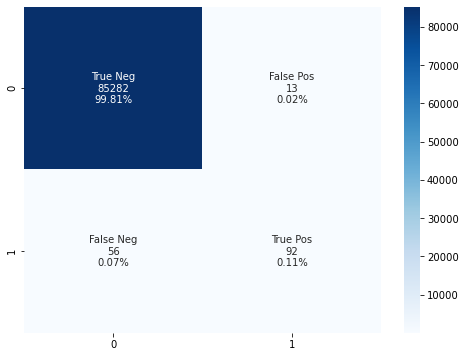

In [81]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                conf_mat.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
plt.figure(figsize=(8,6))
labels = np.asarray(labels).reshape(2,2)
print("\nConfusion Matrix in depth analysis: \n")
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues')

**Machine learning with imporved balance using SMOTE**

In [82]:
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE

resampling = SMOTE(random_state=42, sampling_strategy=0.6)
model = LogisticRegression()

pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [83]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
pipeline.fit(X_train, y_train) 
predicted_lr_smote = model.predict(X_test)

In [84]:
conf_mat_lr_smote = metrics.confusion_matrix(y_true=y_test, y_pred=predicted_lr_smote)
print('\nClassification Report:\n', classification_report(y_test, predicted_lr_smote))
print('\nConfusion matrix:\n', conf_mat_lr_smote)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.14      0.86      0.23       148

    accuracy                           0.99     85443
   macro avg       0.57      0.93      0.61     85443
weighted avg       1.00      0.99      0.99     85443


Confusion matrix:
 [[84475   820]
 [   20   128]]



Confusion Matrix in depth analysis for oversampled data: 



<AxesSubplot:>

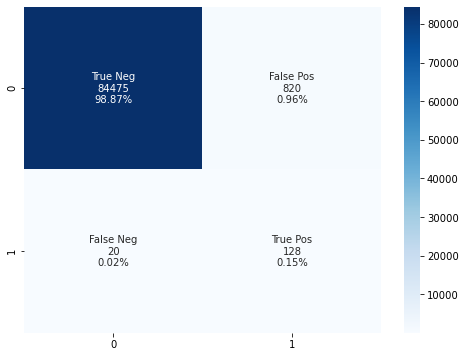

In [85]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                conf_mat_lr_smote.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conf_mat_lr_smote.flatten()/np.sum(conf_mat_lr_smote)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
plt.figure(figsize=(8,6))
labels = np.asarray(labels).reshape(2,2)
print("\nConfusion Matrix in depth analysis for oversampled data: \n")
sns.heatmap(conf_mat_lr_smote, annot=labels, fmt='', cmap='Blues')

### LightGBM

In [37]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
211605,-8.367621,7.402969,-5.114191,-2.966792,-0.985904,-1.660018,0.397816,1.008250,5.290976,9.315735,...,3.589299,-0.557927,0.349087,0.301734,0.662330,1.145939,-0.012273,1.513736,0.669504,0.69
231628,-1.290662,0.764452,-0.169233,-1.688528,1.984718,-0.717210,1.667635,-0.228295,-0.959071,-0.679429,...,0.057620,0.138615,0.390374,-0.678774,0.292254,1.425865,0.265341,0.051405,0.103879,55.47
110643,-0.606860,0.233923,2.633361,-0.155762,-0.328850,-0.070593,0.173023,0.113394,0.680147,-0.686651,...,-0.129287,0.007393,0.265045,-0.040615,0.406088,-0.498823,0.121851,-0.046840,-0.087259,11.50
11478,1.374168,-0.330389,0.812971,-0.183112,-1.074771,-0.933788,-0.544238,-0.348237,0.614925,0.080408,...,0.078163,-0.134742,0.016793,0.002610,0.714527,0.536175,-0.307487,-0.003555,0.013024,10.00
243724,-2.146505,-7.603113,-4.928224,1.449173,-2.083871,-0.984759,3.629816,-1.302973,-1.434148,-0.021909,...,4.009181,1.274986,-0.857670,-2.109682,0.169338,-0.322888,0.777822,-0.552258,0.304777,2290.05


In [38]:
import lightgbm as lgbm
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
        'subsample': '{:.3f}'.format(params['subsample']),
        'max_depth': int(params['max_depth']),
        'reg_alpha': '{:.3f}'.format(params['reg_alpha']),
        'reg_lambda': '{:.3f}'.format(params['reg_lambda']),
        'min_child_weight': int(params['min_child_weight'])
    }
    weights = dict(y_train.value_counts()[0]/y_train.value_counts())
    
    clf = lgbm.LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.01,
        **params,
        class_weight= weights
    )
    
    score = -cross_val_score(clf, X_train, y_train, scoring='roc_auc', 
                             cv=StratifiedKFold(n_splits=5)).mean()
    print("roc_auc {:.3f} params {}".format(score, params))
    return score

space = {
    'num_leaves': hp.quniform('num_leaves', 8,500, 10),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'subsample': hp.uniform('subsample', 0.3, 1.0),
    'max_depth': hp.quniform('max_depth', 5, 15, 2),
    'reg_alpha':hp.uniform('reg_alpha', 0.01, 0.1),
    'reg_lambda': hp.uniform('reg_lambda', 0.01, 0.1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 100,1)
}

best = fmin(fn=objective,space=space,algo=tpe.suggest,max_evals=10)

roc_auc -0.984 params {'num_leaves': 130, 'colsample_bytree': '0.568', 'subsample': '0.527', 'max_depth': 8, 'reg_alpha': '0.093', 'reg_lambda': '0.086', 'min_child_weight': 47}
roc_auc -0.985 params {'num_leaves': 390, 'colsample_bytree': '0.511', 'subsample': '0.435', 'max_depth': 6, 'reg_alpha': '0.043', 'reg_lambda': '0.023', 'min_child_weight': 33}
roc_auc -0.984 params {'num_leaves': 20, 'colsample_bytree': '0.361', 'subsample': '0.828', 'max_depth': 14, 'reg_alpha': '0.081', 'reg_lambda': '0.062', 'min_child_weight': 12}
roc_auc -0.984 params {'num_leaves': 190, 'colsample_bytree': '0.693', 'subsample': '0.722', 'max_depth': 10, 'reg_alpha': '0.057', 'reg_lambda': '0.052', 'min_child_weight': 54}
roc_auc -0.984 params {'num_leaves': 140, 'colsample_bytree': '0.439', 'subsample': '0.657', 'max_depth': 10, 'reg_alpha': '0.095', 'reg_lambda': '0.014', 'min_child_weight': 38}
roc_auc -0.982 params {'num_leaves': 470, 'colsample_bytree': '0.843', 'subsample': '0.613', 'max_depth': 14

In [39]:
import lightgbm as lgb
best =  {**best}
best['max_depth'] = int(best['max_depth'])
best['min_child_weight'] = int(best['min_child_weight'])
best['num_leaves'] = int(best['num_leaves'])


weights = dict(y_train.value_counts()[0]/
                y_train.value_counts())

lgb_model = lgb.LGBMClassifier(**best,
                                 n_estimators=1000,
                                 learning_rate=0.01,
                                class_weight= weights)

train_features = np.array(X_train)
labels = np.array(y_train)

lgb_model.fit(train_features,labels)

LGBMClassifier(class_weight={0: 1.0, 1: 578.546511627907},
               colsample_bytree=0.5110735020995197, learning_rate=0.01,
               max_depth=6, min_child_weight=33, n_estimators=1000,
               num_leaves=390, reg_alpha=0.04310726640457957,
               reg_lambda=0.022851669709335325, subsample=0.4354872362452099)

In [40]:
from sklearn.metrics import confusion_matrix
y_pred1 = lgb_model.predict(X_test)
y_test1 = np.array(y_test)
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

[[85255    40]
 [   26   122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.75      0.82      0.79       148

    accuracy                           1.00     85443
   macro avg       0.88      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443



# Deep Learning model

###  Keras model

In [41]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [42]:
# define the keras model
model = Sequential()
model.add(Dense(30, input_dim=29, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=20, batch_size=100, verbose=1)
# make class predictions with the model
predictions = (model.predict(X_test) > 0.5).astype(int)

Epoch 1/20
1994/1994 [==============================] - 1s 533us/step - loss: 0.0155 - accuracy: 0.9991
Epoch 2/20
1994/1994 [==============================] - 1s 481us/step - loss: 0.0063 - accuracy: 0.9993
Epoch 3/20
1994/1994 [==============================] - 1s 482us/step - loss: 0.0042 - accuracy: 0.9994
Epoch 4/20
1994/1994 [==============================] - 1s 480us/step - loss: 0.0045 - accuracy: 0.9993
Epoch 5/20
1994/1994 [==============================] - 1s 483us/step - loss: 0.0040 - accuracy: 0.9994
Epoch 6/20
1994/1994 [==============================] - 1s 483us/step - loss: 0.0035 - accuracy: 0.9994
Epoch 7/20
1994/1994 [==============================] - 1s 483us/step - loss: 0.0036 - accuracy: 0.9994
Epoch 8/20
1994/1994 [==============================] - 1s 482us/step - loss: 0.0038 - accuracy: 0.9995
Epoch 9/20
1994/1994 [==============================] - 1s 484us/step - loss: 0.0029 - accuracy: 0.9995
Epoch 10/20
1994/1994 [==============================] - 1s 479u

In [43]:
temp_df = pd.DataFrame(predictions, columns =['pred'])

temp_df['exp'] = y_test.to_list()

tp = temp_df[(temp_df['pred']==1) & (temp_df['exp'] == 1)].shape[0]
fp = temp_df[(temp_df['pred']==1) & (temp_df['exp'] == 0)].shape[0]
tn = temp_df[(temp_df['pred']==0) & (temp_df['exp'] == 0)].shape[0]
fn = temp_df[(temp_df['pred']==0) & (temp_df['exp'] == 1)].shape[0]

prec = tp/(tp+fp)
rec = tp/(tp+fn)
f1 = 2*(prec*rec)/(prec+rec)

print('Precision: ',prec ,'\nRecall: ', rec,'\nF1: ', f1)

Precision:  0.8931297709923665 
Recall:  0.7905405405405406 
F1:  0.838709677419355



Confusion Matrix in depth analysis: 



<AxesSubplot:>

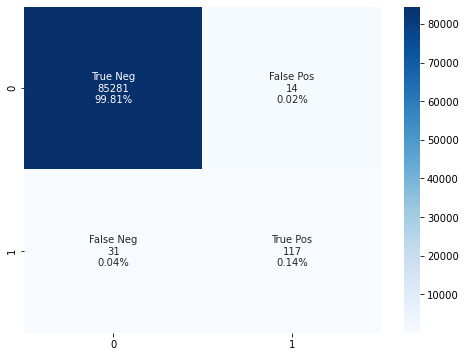

In [44]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = [tn,fp,fn,tp]
group_percentages = ['{0:.2%}'.format(value) for value in
                     group_counts/np.sum(group_counts)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
plt.figure(figsize=(8,6))
labels = np.asarray(labels).reshape(2,2)
print("\nConfusion Matrix in depth analysis: \n")
sns.heatmap(conf_mat_lr_smote, annot=labels, fmt='', cmap='Blues')

### Random Forest

In [90]:

from sklearn.ensemble import RandomForestClassifier
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'min_samples_leaf':int(params['min_samples_leaf']),
        'min_samples_split':int(params['min_samples_split'])
    }
    weights = dict(y_train.value_counts()[0]/y_train.value_counts())
    
    clf = RandomForestClassifier(
        n_estimators=100,
        **params,
    )
    
    score = -cross_val_score(clf, X_train, y_train, scoring='roc_auc', 
                             cv=StratifiedKFold(n_splits=5)).mean()
    print("roc_auc {:.3f} params {}".format(score, params))
    return score

space = {
    'max_depth': hp.quniform('max_depth', 4, 10, 2),
    'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
     'min_samples_split':hp.uniform('min_samples_split',2,6)}


best = fmin(fn=objective,space=space,algo=tpe.suggest,max_evals=5)


roc_auc -0.969 params {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2}                                  
roc_auc -0.975 params {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3}                                 
roc_auc -0.958 params {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}                                  
roc_auc -0.962 params {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5}                                  
roc_auc -0.971 params {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 4}                                  
100%|████████████████████████████████████████████████| 5/5 [13:48<00:00, 165.66s/trial, best loss: -0.9746913006725281]


In [92]:
best =  {**best}
best['max_depth'] = int(best['max_depth'])
best['min_samples_leaf'] = int(best['min_samples_leaf'])
best['min_samples_split'] = int(best['min_samples_split'])



rf_model = RandomForestClassifier(**best,
                                  n_estimators=100,
                                 bootstrap = True,
                               max_features = 'sqrt')


rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=3)

In [93]:
# Actual class predictions
rf_predictions = rf.predict(X_test)

In [94]:
y_test1 = np.array(y_test)
rf_predictions = rf_predictions.astype(int)
print(confusion_matrix(y_test1, rf_predictions))
print(classification_report(y_test1, rf_predictions))

[[85288     7]
 [   46   102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.69      0.79       148

    accuracy                           1.00     85443
   macro avg       0.97      0.84      0.90     85443
weighted avg       1.00      1.00      1.00     85443

